In [ ]:
import os,glob
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
path = Path('runs/detect/exp5/labels')

In [111]:
files= glob.glob(str(path / '*.txt'))
for file in files:
    filename = file.split('\\')[-1]
    dir_name = path/ '_'.join(filename.split('_')[:-1])
    if not(dir_name.is_dir()):
        os.makedirs(dir_name) 
    dst = dir_name/filename 
    os.rename(path/filename, dst)

In [103]:
i = 10
video = path /os.listdir(path)[i]
preds = glob.glob(str(video / '*.txt'))
idx = [int(file.split('_')[-1].split('_')[-1][:-4]) for file in preds]
idx.sort()
fix = video / video.name
preds = [str(fix)+ '_'+str(i) + '.txt' for i in idx]

In [104]:
n_cells = []
type_cells = []
for file in preds:
    with open(file, 'r') as f:
        lines = f.readlines()
        n_cells.append(len(lines))
        if len(lines) > 0:
            type_cells.append(lines[0].split()[0])
        else:
            type_cells.append('None')

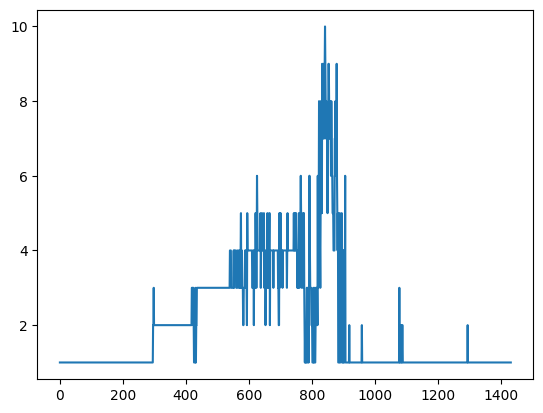

In [105]:
plt.plot(n_cells)

In [106]:
frame_cells = {i:n_cells.index(i)  for i in np.unique(n_cells)}
frame_type = {i:type_cells.index(i)  for i in np.unique(type_cells) if i != 'None'}


In [107]:
frame_cells

{1: 0, 2: 296, 3: 298, 4: 540, 5: 575, 6: 626, 7: 831, 8: 823, 9: 833, 10: 842}

In [108]:
frame_type

{'0': 1094, '1': 0, '2': 770}

In [109]:
video

WindowsPath('runs/detect/exp5/labels/9769_well02_MMP')

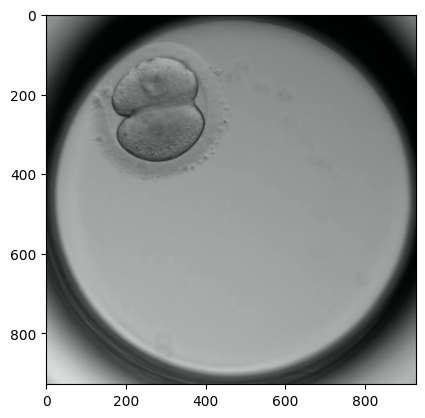

In [110]:
path_video = 'runs/detect/exp5/9769_well02_MMP.mp4'
cap = cv2.VideoCapture(path_video)
#get a frame 
cap.set(1, 296)  # Set the frame position to the first frame
ret, frame = cap.read()
plt.imshow(frame)

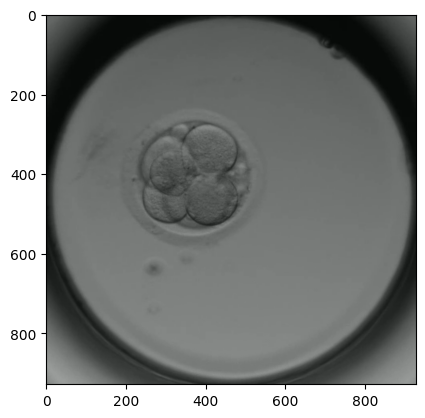

In [93]:
path_video = 'runs/detect/exp5/9695_well01_MRC.mp4'
cap = cv2.VideoCapture(path_video)
#get a frame 
cap.set(1, 417)  # Set the frame position to the first frame
ret, frame = cap.read()
plt.imshow(frame)


In [ ]:

fps = cap.get(cv2.CAP_PROP_FPS)
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cap.release()

WindowsPath('runs/detect/exp5/labels/9695_well01_MRC')

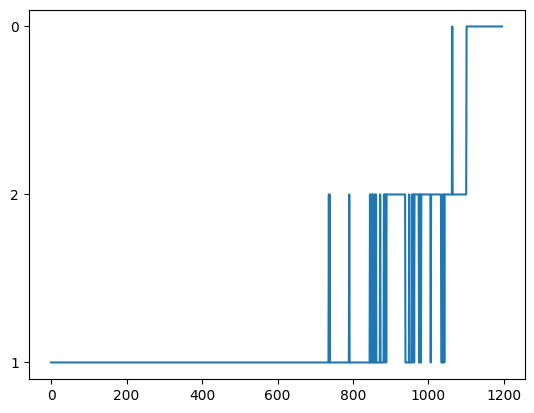

In [69]:
plt.plot(type_cells)